# Car Price Prediction Assignment

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Carprice dataset

In [1]:
# ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

In [3]:
carprice = pd.read_csv(r"C:\Users\Niks\Downloads\LR case study Assign\CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the carprice dataframe

In [5]:
carprice.shape

(205, 26)

In [6]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 2 : Data Cleaning and Preparation

In [8]:
#Splitting company name from CarName column
CompanyName = carprice['CarName'].apply(lambda x : x.split(' ')[0])
carprice.insert(3,"CompanyName",CompanyName)

carprice.drop(['CarName'],axis=1,inplace=True)

In [9]:
carprice.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# drop the Car id column in the dataset 
carprice.drop(['car_ID'],axis=1,inplace=True)

In [11]:
carprice.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

In [12]:
carprice.CompanyName = carprice.CompanyName.str.lower()

def replace(w,y):
    carprice.CompanyName.replace(w,y,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [13]:
# check the unique row name for CompanyName
carprice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Step 3: Visualizing the data

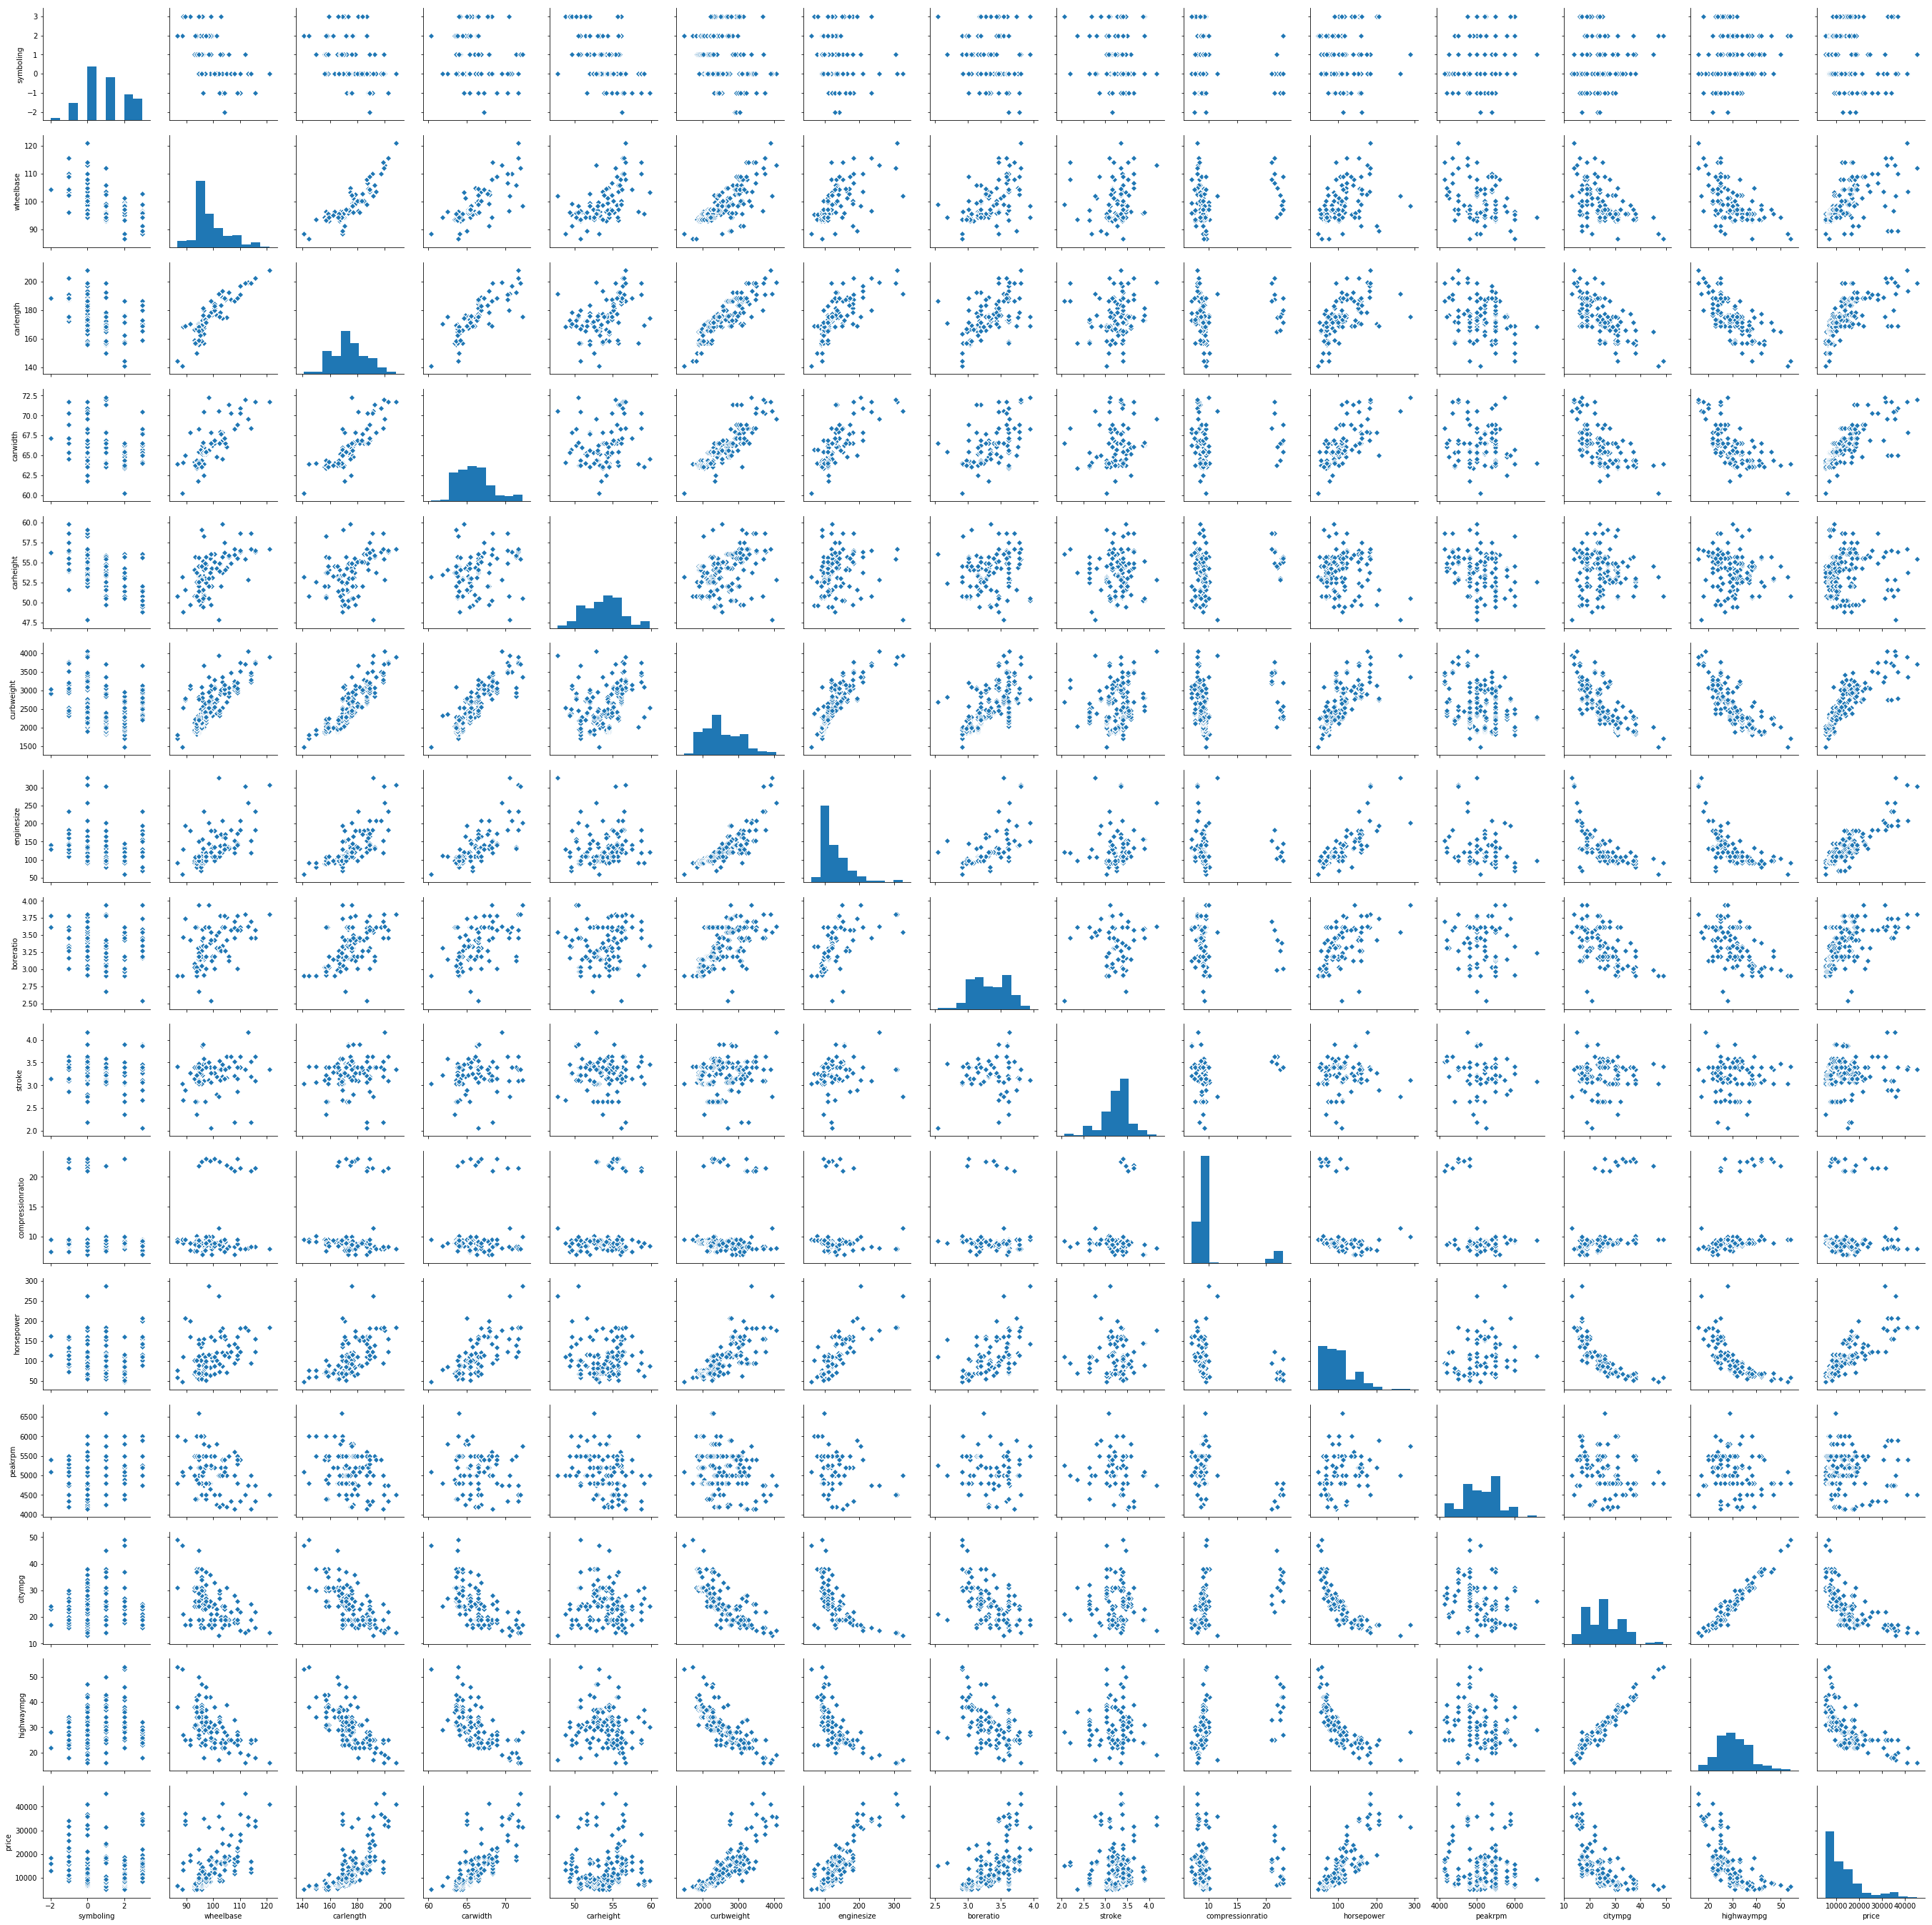

In [14]:
sns.pairplot(carprice,markers=["D"])
plt.show()

#### Step 3.1 : Visualising Categorical Data

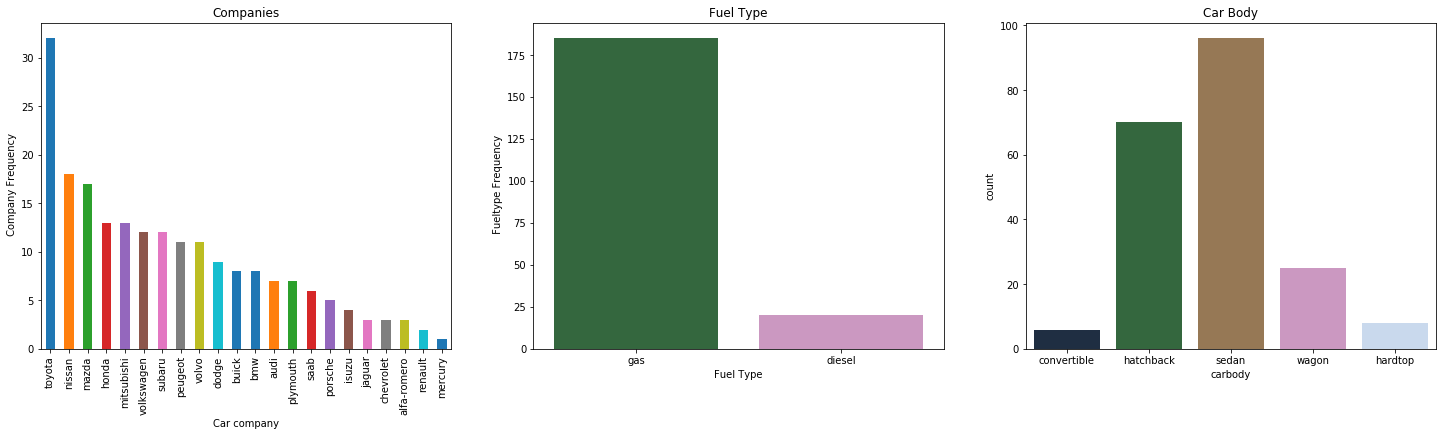

In [15]:
# making the histogram for categorial data to visualize
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = carprice.CompanyName.value_counts().plot('bar')
plt.title('Companies')
plt1.set(xlabel = 'Car company', ylabel=' Company Frequency')

plt.subplot(1,3,2)
plt1 = sns.countplot(carprice.fueltype, palette=("cubehelix"))
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel=' Fueltype Frequency')

plt.subplot(1,3,3)
plt.title('Car Body')
sns.countplot(carprice.carbody, palette=("cubehelix"))

plt.show()

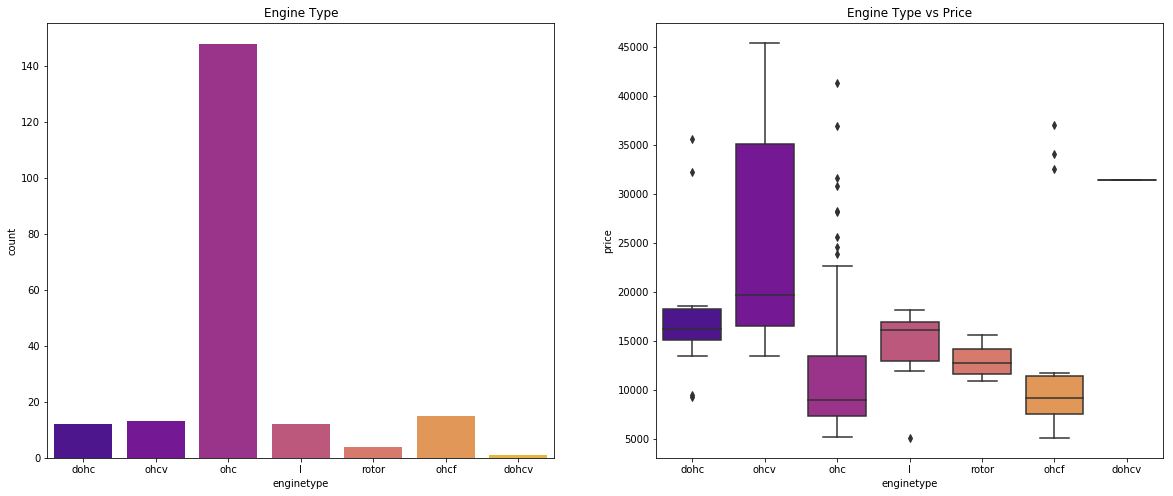

In [16]:
# making histogram vs boxplot for Engine type
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type')
sns.countplot(carprice.enginetype, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=carprice.enginetype, y=carprice.price, palette=("plasma"))

plt.show()


#### Conclusion :

1. `ohc` Engine type seems to be most favored type.
2. `ohcv` has the highest price range (While `dohcv` has only one row), `ohc` and `ohcf` have the low price range.

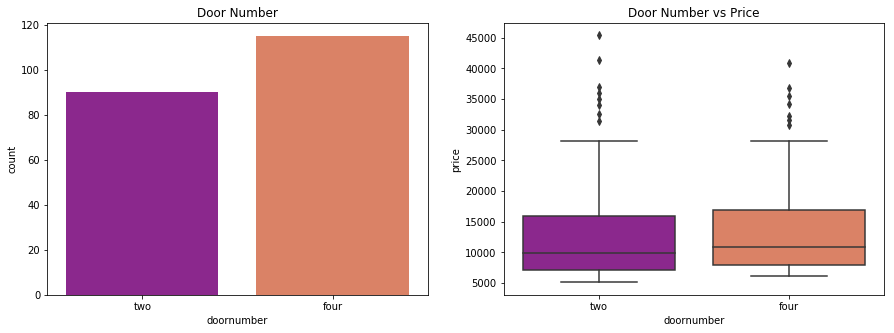

In [17]:
# making histogram and baxplot for the doornumber & Aspiration
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number')
sns.countplot(carprice.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=carprice.doornumber, y=carprice.price, palette=("plasma"))

plt.show()


#### Conclusion:

1. `doornumber` variable is not affacting the price much. There is no sugnificant difference between the categories in it.

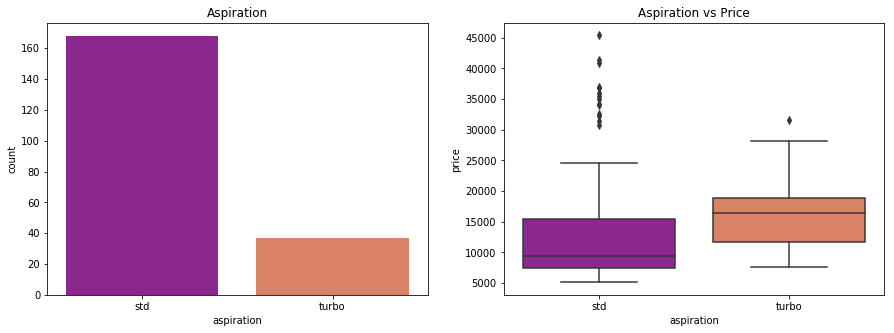

In [18]:
# lets make histogram and boxplot for the aspiration vs price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration')
sns.countplot(carprice.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=carprice.aspiration, y=carprice.price, palette=("plasma"))

plt.show()


### Conclusion :
It seems aspiration with `turbo` have higher price range than the `std`(though it has some high values outside the whiskers.)

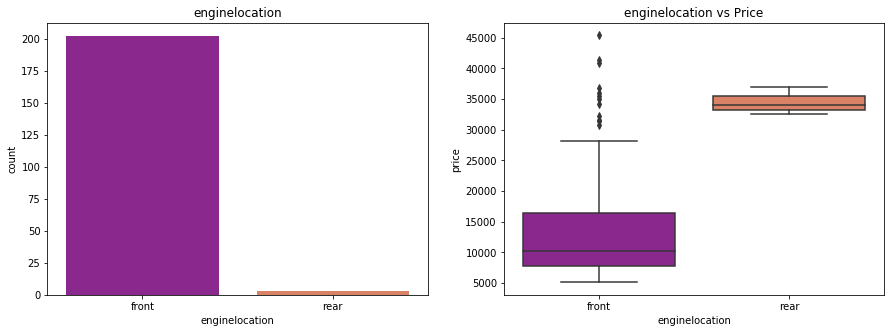

In [19]:
# lets make histogram and boxplot for the enginelocation vs price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('enginelocation')
sns.countplot(carprice.enginelocation, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('enginelocation vs Price')
sns.boxplot(x=carprice.enginelocation, y=carprice.price, palette=("plasma"))

plt.show()


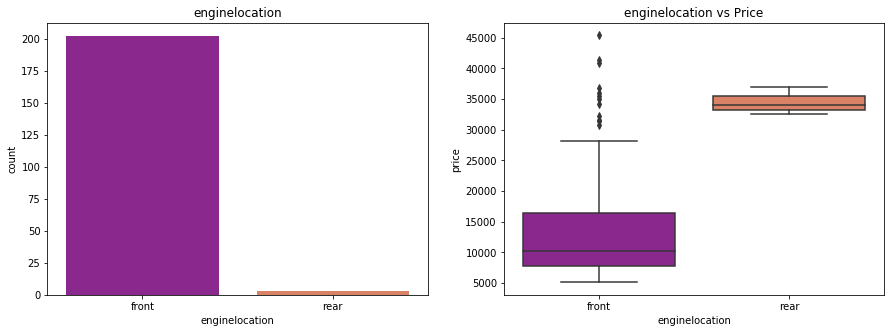

In [20]:
# lets make histogram and boxplot for the enginelocation vs price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('enginelocation')
sns.countplot(carprice.enginelocation, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('enginelocation vs Price')
sns.boxplot(x=carprice.enginelocation, y=carprice.price, palette=("plasma"))

plt.show()


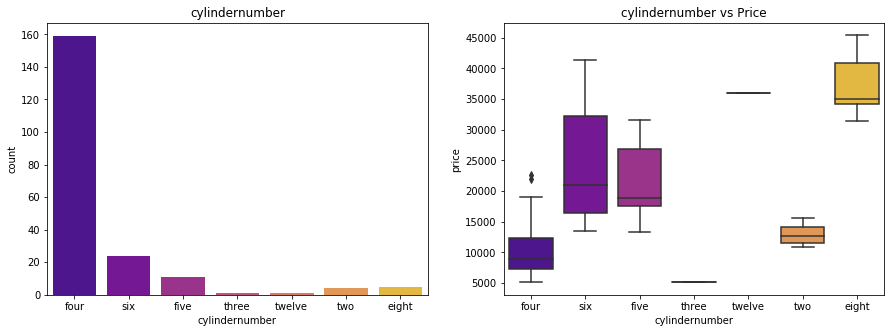

In [21]:
# lets make histogram and boxplot for the cylindernumber vs price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('cylindernumber')
sns.countplot(carprice.cylindernumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('cylindernumber vs Price')
sns.boxplot(x=carprice.cylindernumber, y=carprice.price, palette=("plasma"))

plt.show()


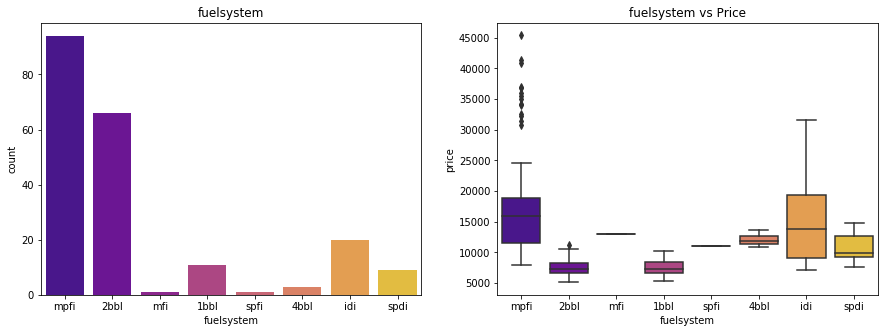

In [22]:
# lets make histogram and boxplot for the fuelsystem vs price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('fuelsystem')
sns.countplot(carprice.fuelsystem, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('fuelsystem vs Price')
sns.boxplot(x=carprice.fuelsystem, y=carprice.price, palette=("plasma"))

plt.show()


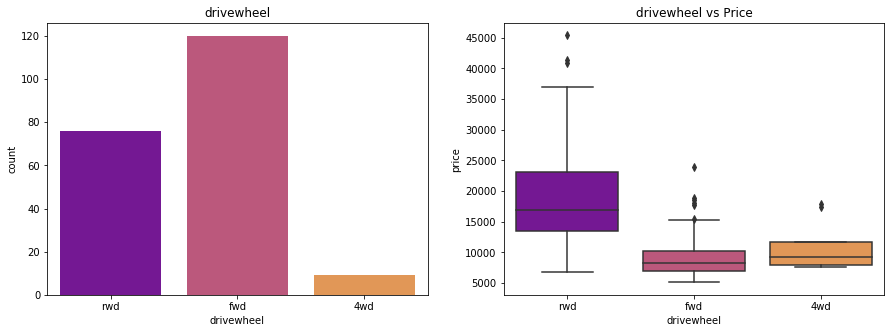

In [23]:
# lets make histogram and boxplot for the drivewheel vs price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('drivewheel')
sns.countplot(carprice.drivewheel, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('drivewheel vs Price')
sns.boxplot(x=carprice.drivewheel, y=carprice.price, palette=("plasma"))

plt.show()



#### Conclusion :

1. Very few datapoints for `enginelocation` categories to make an inference.
2. Most common number of cylinders are `four`, `six` and `five`. Though `eight` cylinders have the highest price range.
3. `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer `rwd` drivewheel.

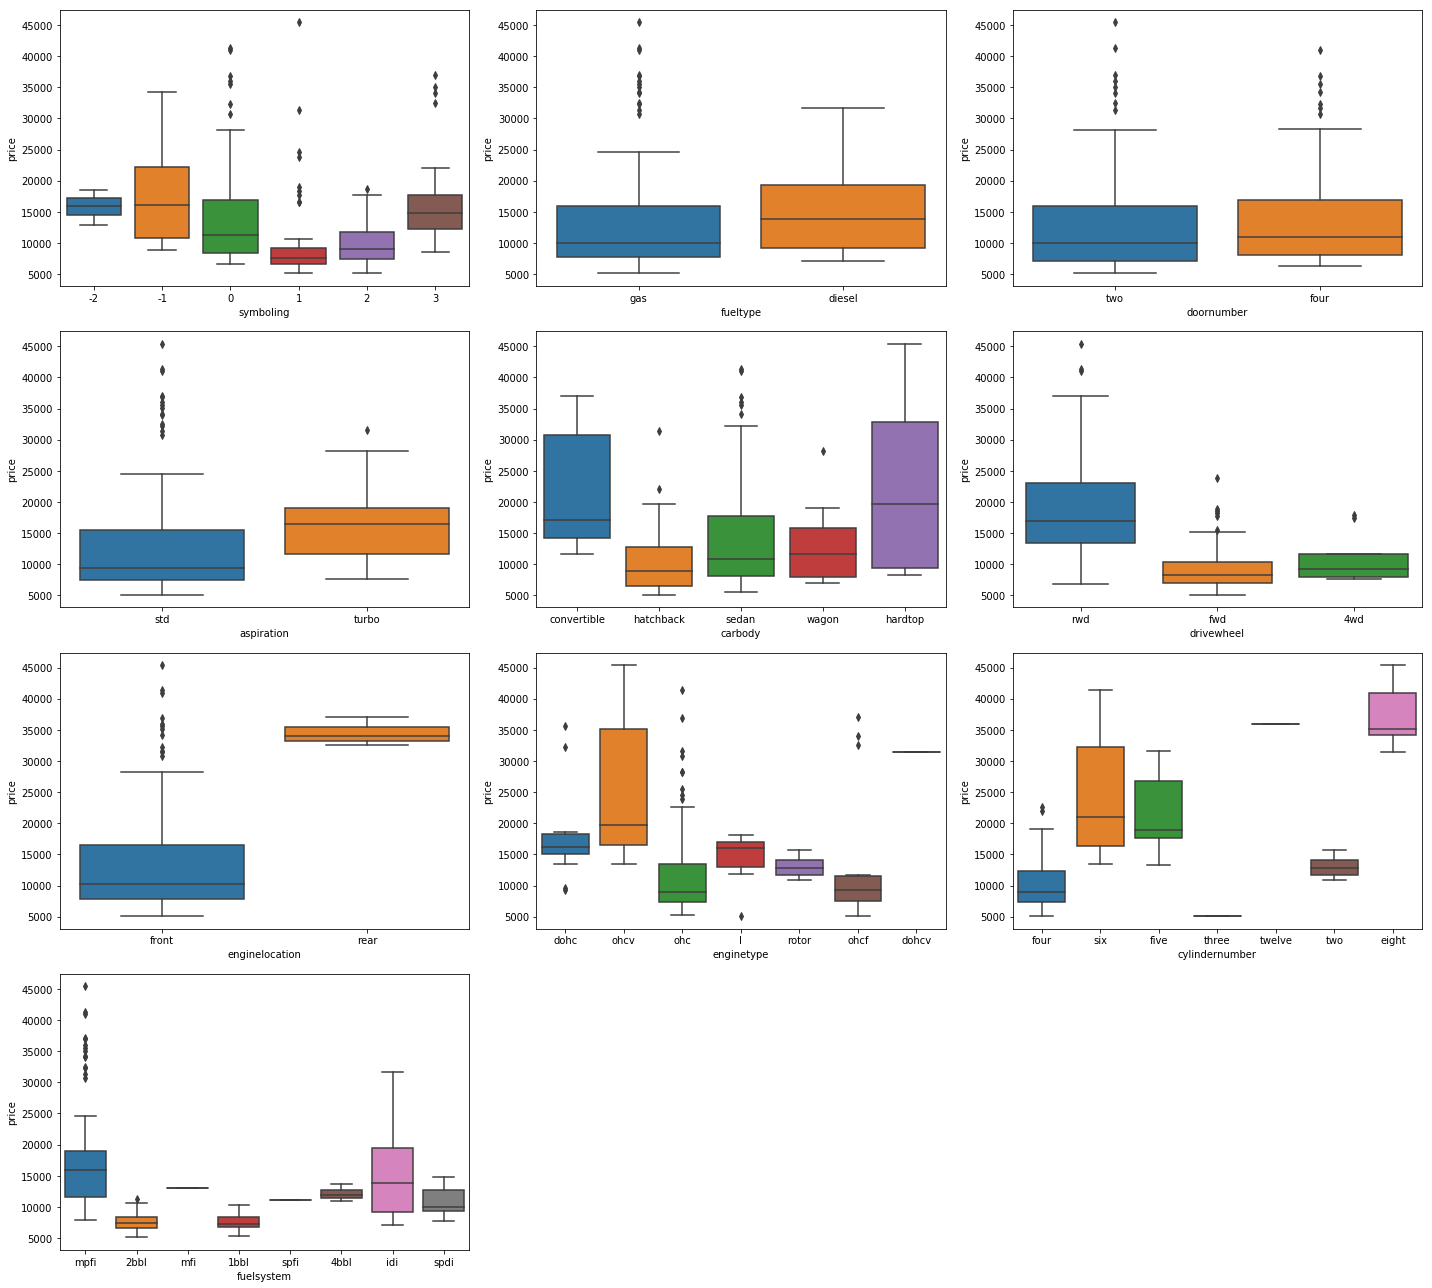

In [24]:
# visualise the categoreial variable using `Box Plot`
plt.figure(figsize=(20,18))


plt.subplot(4,3,1)
sns.boxplot(x='symboling',y='price',data=carprice)

plt.subplot(4,3,2)
sns.boxplot(x='fueltype',y='price',data=carprice)

plt.subplot(4,3,3)
sns.boxplot(x='doornumber',y='price',data=carprice)

plt.subplot(4,3,4)
sns.boxplot(x='aspiration',y='price',data=carprice)

plt.subplot(4,3,5)
sns.boxplot(x='carbody',y='price',data=carprice)

plt.subplot(4,3,6)
sns.boxplot(x='drivewheel',y='price',data=carprice)

plt.subplot(4,3,7)
sns.boxplot(x='enginelocation',y='price',data=carprice)

plt.subplot(4,3,8)
sns.boxplot(x='enginetype',y='price',data=carprice)

plt.subplot(4,3,9)
sns.boxplot(x='cylindernumber',y='price',data=carprice)

plt.subplot(4,3,10)
sns.boxplot(x='fuelsystem',y='price',data=carprice)



plt.tight_layout()
plt.show()


#### Step 3.2 : Visualising numerical data

C:\Users\Niks\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


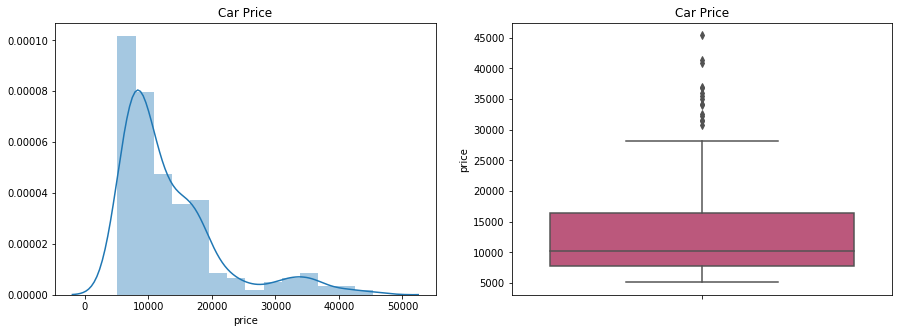

In [25]:
#visulize the numeric variable price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Price')
sns.distplot(carprice.price)

plt.subplot(1,2,2)
plt.title('Car Price')
sns.boxplot(y=carprice.price,palette=("plasma"))

plt.show()

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000),50% is (10,000).

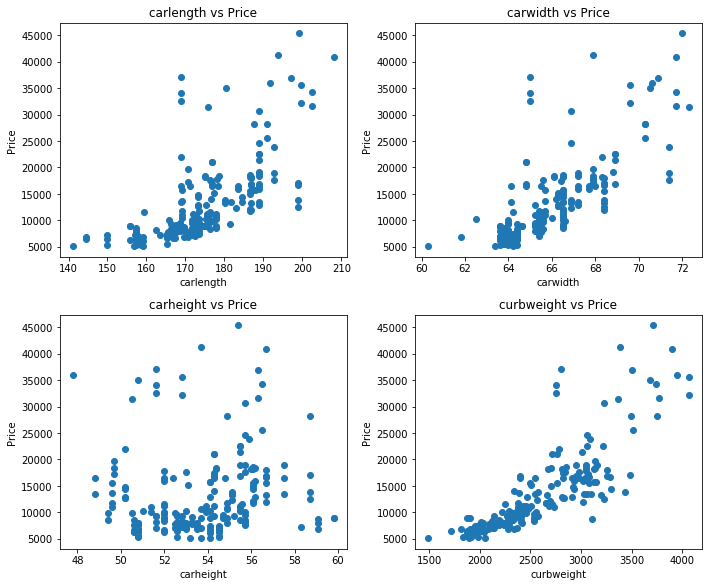

In [26]:
def plot (x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(carprice[x],carprice['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

plot('carlength', 1)
plot('carwidth', 2)
plot('carheight', 3)
plot('curbweight', 4)


plt.tight_layout()

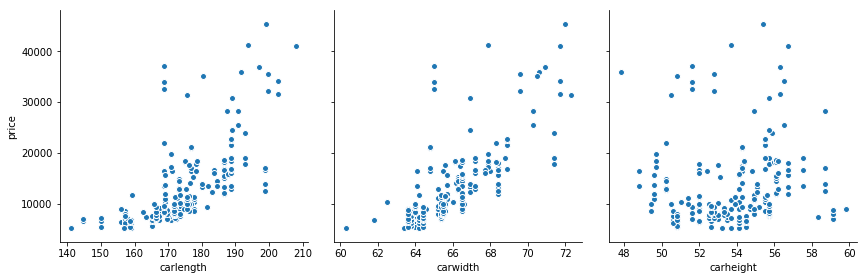

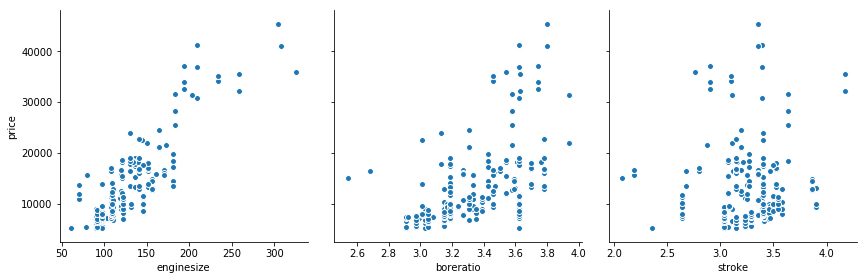

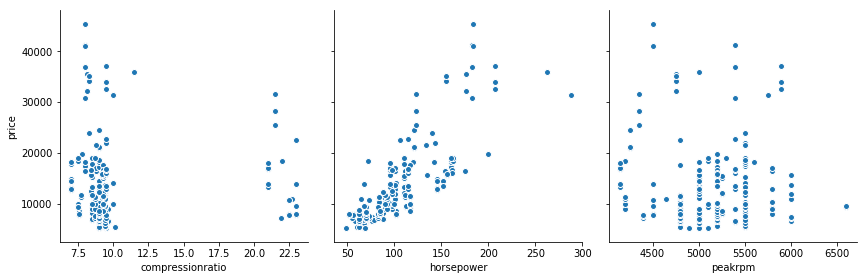

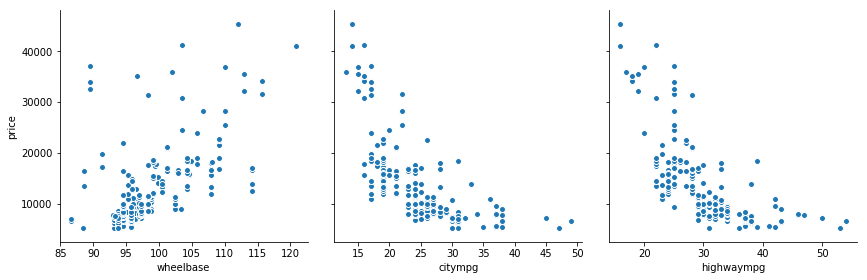

In [27]:
def plot(x,y,z):
    sns.pairplot(carprice, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

plot('carlength','carwidth', 'carheight')
plot('enginesize', 'boreratio', 'stroke')
plot('compressionratio', 'horsepower', 'peakrpm')
plot('wheelbase', 'citympg', 'highwaympg')

#### Conclusion:

1. `carwidth`, `carlength` and `curbweight` seems to have a poitive correlation with `price`. 
2. `carheight` doesn't show any significant trend with price.
3. `enginesize`, `boreratio`, `horsepower`, `wheelbase` - seem to have a significant positive correlation with price.
4. `citympg`, `highwaympg` - seem to have a significant negative correlation with price.

In [28]:
carprice.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Step 4 : Deriving new features

- Lets create the new column CarsRange and create the Binn according to the price and divide them in three category Low,Medium,High so we can visulize better.

In [29]:
#Binning the Car Companies based on avg prices of each Company.

carprice['price'] = carprice['price'].astype('int')

# make copy of masterdata
temporary = carprice.copy()

In [30]:
# perform the left join 
table1 = temporary.groupby(['CompanyName'])['price'].mean()
temporary = temporary.merge(table1.reset_index(), how='left',on='CompanyName')

In [31]:
#create the bins
bins = [0,10000,20000,40000]
car_bin=['Low','Medium','High']
carprice['CarsRange'] = pd.cut(temporary['price_y'],bins,right=False,labels=car_bin)
carprice.head(10)

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarsRange
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,Medium
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710,Medium
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920,Medium
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875,Medium
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859,Medium


### After Visualize the dataset we got the List of significant variables  :

In [32]:
carprice1 = carprice[['price','CompanyName','fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                       'carlength','carwidth', 'CarsRange']]
carprice1.head()

,price,CompanyName,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,CarsRange
0,13495,alfa-romero,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
1,16500,alfa-romero,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
2,16500,alfa-romero,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,Medium
3,13950,audi,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,Medium
4,17450,audi,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,Medium


### Step 6 : Label Encoder & Dummy Variables

- You can see that your dataset has many columns with values like gas,diesel.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'gas' and 0 is a 'diesel'.

In [33]:
# Defining the map function
def dummi(y,df):
    temp = pd.get_dummies(df[y], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([y], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

carprice1 = dummi('fueltype',carprice1)
carprice1 = dummi('aspiration',carprice1)
carprice1 = dummi('carbody',carprice1)
carprice1 = dummi('drivewheel',carprice1)
carprice1 = dummi('enginetype',carprice1)
carprice1 = dummi('cylindernumber',carprice1)
carprice1 = dummi('CarsRange',carprice1)

In [34]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
carprice1['CompanyName']= label_encoder.fit_transform(carprice1['CompanyName']) 
  
carprice1['CompanyName'].unique() 

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9,  3, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [35]:
carprice1.head()

,price,CompanyName,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,High
0,13495,0,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,0,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,0,94.5,2823,152,2.68,154,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,1,99.8,2337,109,3.19,102,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,1,99.4,2824,136,3.19,115,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [36]:
carprice.shape

(205, 26)

### Step 7 : Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [37]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
df_train.shape

(143, 31)

In [39]:
df_test.shape

(62, 31)

### Step 8 : Rescaling the Features 

This time, we will use MinMax scaling.
- methods : 
- fit() => used on train dataset
- transform() => used on test dataset
- fit_transform() => used on train dataset

In [40]:
# Apply scaler() to all the columns except the 'yes-no' and 'Label Encoder' variables
scaler = MinMaxScaler()

newvariable = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']

df_train[newvariable] = scaler.fit_transform(df_train[newvariable])


In [41]:
df_train.head()

,price,CompanyName,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,High
122,0.068818,14,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,15,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,19,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,21,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [42]:
df_train.describe()

,price,CompanyName,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,High
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,11.811189,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,6.259585,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,6.000000,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,12.000000,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,18.000000,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


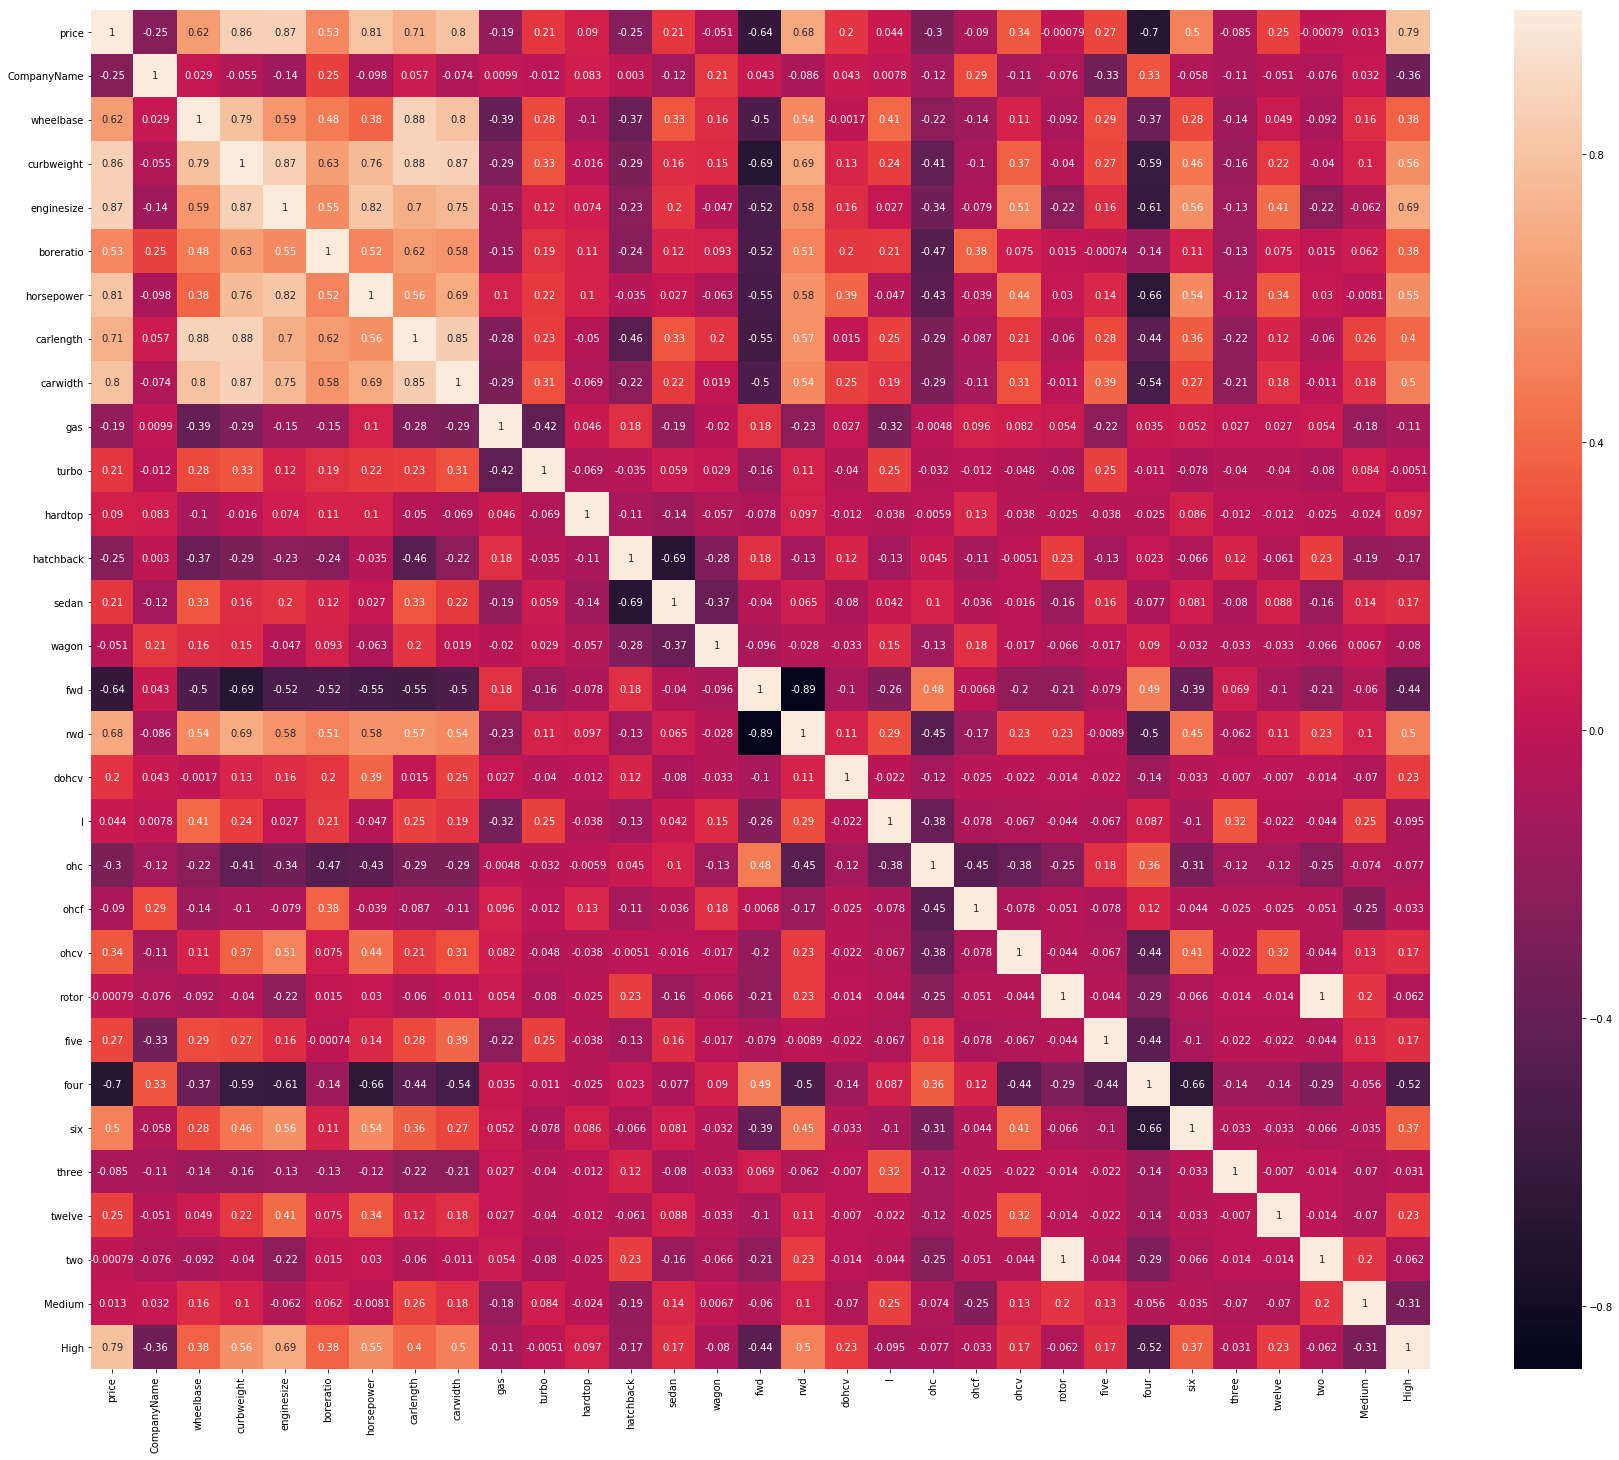

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [44]:
carprice1.corr(method ='pearson')

,price,CompanyName,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,High
price,1.000000,-2.622339e-01,0.577816,0.835305,0.874145,0.553174,0.808138,0.682921,0.759325,-0.105680,0.177927,0.225854,-0.262039,0.125716,-0.042309,-6.019506e-01,0.638957,0.159221,0.042268,-0.344270,0.016285,0.385992,-0.004544,0.249606,-0.697762,0.474978,-0.071388,0.199634,-0.004544,-0.004786,0.800164
CompanyName,-0.262234,1.000000e+00,-0.013288,-0.077989,-0.174513,0.191301,-0.109686,0.030733,-0.103779,-0.055049,0.011326,0.029723,-0.031165,-0.048634,0.140243,-5.889568e-17,-0.032530,0.031259,0.001988,-0.070484,0.232973,-0.145538,-0.071981,-0.332056,0.345301,-0.072095,-0.091545,-0.046889,-0.071981,0.083223,-0.372088
wheelbase,0.577816,-1.328769e-02,1.000000,0.776386,0.569329,0.488750,0.353294,0.874587,0.795144,-0.308346,0.257611,-0.008608,-0.386094,0.291086,0.210899,-4.603551e-01,0.498830,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174,0.195713,0.333254
curbweight,0.835305,-7.798933e-02,0.776386,1.000000,0.850594,0.648480,0.750739,0.877728,0.867032,-0.217275,0.324902,0.098956,-0.287501,0.099425,0.164075,-6.660394e-01,0.669987,0.109243,0.250124,-0.413293,-0.080295,0.400878,-0.039196,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196,0.121121,0.531915
enginesize,0.874145,-1.745132e-01,0.569329,0.850594,1.000000,0.583774,0.809769,0.683360,0.735433,-0.069594,0.108217,0.239363,-0.216805,0.088459,-0.027518,-5.183915e-01,0.565509,0.128248,0.016063,-0.363334,-0.016508,0.562403,-0.184762,0.144878,-0.631431,0.511783,-0.111081,0.335555,-0.184762,-0.076629,0.686368
boreratio,0.553174,1.913014e-01,0.488750,0.648480,0.583774,1.000000,0.573677,0.606454,0.559150,-0.054451,0.212614,0.208089,-0.227032,0.030517,0.105719,-5.830867e-01,0.574105,0.158136,0.181729,-0.410383,0.326798,0.119509,0.000127,-0.007797,-0.164076,0.128365,-0.108774,0.054482,0.000127,0.050525,0.371522
horsepower,0.808138,-1.096865e-01,0.353294,0.750739,0.809769,0.573677,1.000000,0.552623,0.640732,0.163926,0.241685,0.194801,-0.053770,-0.024097,-0.063081,-5.444383e-01,0.575564,0.326367,-0.054469,-0.427616,0.044752,0.431539,0.019250,0.110692,-0.639552,0.533544,-0.099600,0.280220,0.019250,-0.004277,0.557006
carlength,0.682921,3.073326e-02,0.874587,0.877728,0.683360,0.606454,0.552623,1.000000,0.841118,-0.212679,0.234539,0.047292,-0.436269,0.269647,0.219683,-5.087139e-01,0.538370,0.009391,0.261715,-0.274413,-0.118320,0.244053,-0.057877,0.259894,-0.400210,0.262981,-0.187445,0.100413,-0.057877,0.286389,0.373687
carwidth,0.759325,-1.037791e-01,0.795144,0.867032,0.735433,0.559150,0.640732,0.841118,1.000000,-0.233880,0.300567,0.066360,-0.222308,0.154637,0.060639,-4.721164e-01,0.511149,0.209136,0.210771,-0.286211,-0.124446,0.348869,-0.013699,0.397690,-0.523135,0.209246,-0.183473,0.153516,-0.013699,0.219547,0.453143
gas,-0.105680,-5.504938e-02,-0.308346,-0.217275,-0.069594,-0.054451,0.163926,-0.212679,-0.233880,1.000000,-0.401397,-0.018635,0.202093,-0.185623,-0.028183,9.034249e-02,-0.122035,0.023020,-0.268163,-0.020584,0.092384,0.085556,0.046383,-0.213527,0.020184,0.068594,0.023020,0.023020,0.046383,-0.153571,-0.084807


Highly correlated variables to price are - `curbweight`, `enginesize`, `horsepower`,`carwidth` and `highend`.

### Dividing into X and Y sets for the model building

In [45]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

## Step 9 : Model Building

#### 9.1 : We can use the RFE(Recursive feature elimination) which is LinerarRegression Function

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [47]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('CompanyName', False, 21),
 ('wheelbase', False, 2),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 11),
 ('horsepower', True, 1),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('gas', False, 4),
 ('turbo', False, 17),
 ('hardtop', False, 3),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 18),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 20),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 12),
 ('rotor', False, 16),
 ('five', False, 6),
 ('four', False, 5),
 ('six', False, 10),
 ('three', True, 1),
 ('twelve', False, 9),
 ('two', False, 19),
 ('Medium', False, 14),
 ('High', True, 1)]

In [49]:
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'three', 'High'],
      dtype='object')

### Step 10 : Building model using statsmodel, for the detailed statistics

In [50]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,horsepower,carwidth,hatchback,sedan,wagon,dohcv,three,High
122,0.272692,0.139623,0.083333,0.291667,0,1,0,0,0,0
125,0.500388,0.339623,0.395833,0.666667,1,0,0,0,0,1
166,0.314973,0.139623,0.266667,0.308333,1,0,0,0,0,0
1,0.411171,0.260377,0.262500,0.316667,0,0,0,0,0,0
199,0.647401,0.260377,0.475000,0.575000,0,0,1,0,0,0


In [51]:
# lets create the function for building the model so we didnot write the same code again and again for Ordinary least square
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# # lets create the function for Vif so it ll call automatically everytime
def vifchecking(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1

In [53]:
X_train_new = build_model(X_train_rfe,y_train) # fitting the model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.63e-71
Time:                        21:41:11   Log-Likelihood:                 206.41
No. Observations:                 143   AIC:                            -390.8
Df Residuals:                     132   BIC:                            -358.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0312      0.026     -1.192      0.2

p-vale of `enginesize` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [54]:
X_train_new = X_train_rfe.drop(["enginesize"], axis = 1)

### Model 2

In [55]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.22e-71
Time:                        21:41:14   Log-Likelihood:                 205.51
No. Observations:                 143   AIC:                            -391.0
Df Residuals:                     133   BIC:                            -361.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0360      0.026     -1.386      0.1

In [56]:
#Calculating the Variance Inflation Factor
vifchecking(X_train_new)

,Features,VIF
0,const,27.16
1,curbweight,8.13
5,sedan,6.08
4,hatchback,5.66
3,carwidth,5.27
2,horsepower,3.61
6,wagon,3.58
9,High,1.64
7,dohcv,1.46
8,three,1.07


dropping `curbweight` because of high VIF value. (shows that curbweight has high multicollinearity.)

In [57]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

### Model 3

In [58]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.71e-70
Time:                        21:41:17   Log-Likelihood:                 198.48
No. Observations:                 143   AIC:                            -379.0
Df Residuals:                     134   BIC:                            -352.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0379      0.027     -1.395      0.1

In [59]:
vifchecking(X_train_new)

,Features,VIF
0,const,27.15
4,sedan,6.06
3,hatchback,5.56
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.29
8,High,1.57
6,dohcv,1.21
7,three,1.06


Dropping `sedan` because of high VIF value.

In [60]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

### Model 4

In [61]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.00e-69
Time:                        21:41:21   Log-Likelihood:                 193.80
No. Observations:                 143   AIC:                            -371.6
Df Residuals:                     135   BIC:                            -347.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1006      0.018     -5.591      0.0

In [62]:
vifchecking(X_train_new)

,Features,VIF
0,const,11.22
1,horsepower,2.39
2,carwidth,2.15
7,High,1.57
3,hatchback,1.24
5,dohcv,1.21
4,wagon,1.11
6,three,1.06


Drop `wagon` because of High p-value.

In [63]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

### Model 6

In [64]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     244.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.09e-70
Time:                        21:41:25   Log-Likelihood:                 193.25
No. Observations:                 143   AIC:                            -372.5
Df Residuals:                     136   BIC:                            -351.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1042      0.018     -5.903      0.0

In [65]:
vifchecking(X_train_new)

,Features,VIF
0,const,10.80
1,horsepower,2.39
2,carwidth,2.15
6,High,1.54
4,dohcv,1.21
3,hatchback,1.13
5,three,1.06


## Step 10 : Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [66]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

C:\Users\Niks\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

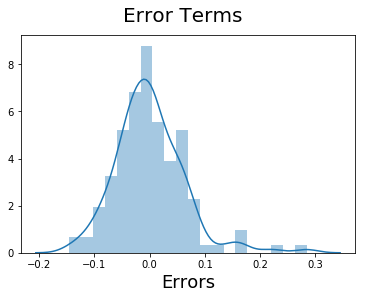

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error seem to approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Step 11 : Prediction and Evaluation

In [68]:
#Scaling the test set
newvariable = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']

df_test[newvariable] = scaler.fit_transform(df_test[newvariable])

#### Dividing into X_test and y_test

In [69]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [70]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)

In [71]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [72]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation: calculate the R-squared score on the test set.

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8123962690712397

Text(0,0.5,'y_pred')

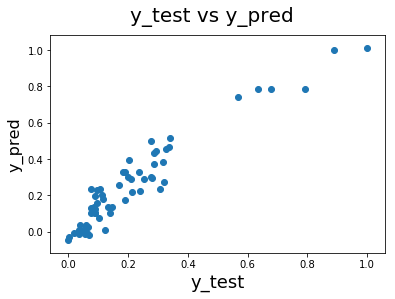

In [74]:
# Plotting y_test and y_pred.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)   

In [75]:
# Evaluation Summary using final model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     244.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.09e-70
Time:                        21:41:38   Log-Likelihood:                 193.25
No. Observations:                 143   AIC:                            -372.5
Df Residuals:                     136   BIC:                            -351.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1042      0.018     -5.903      0.0

#### Final Model Concusion :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.915 and 0.911 - `91%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 244.2 and 3.09e-70(approx. 0.0) - Model fit is significant and explained `91%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

## Final Outcome From Regression :-

1. Final Significant Variables for Prediction the carprice for :-

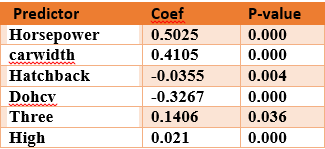

2. The Equation of Best Fit Line is :
 
  
price = -0.1042 + 0.5025 × horsepower + 0.4105 × carwidth + (-0.0355) × hatchback + (-0.3267) × dohcv + 0.1406 × three + 0.021 × high